## 4.9 Intro to Data Visualization with Python

### Contents

### Exercise 4.9 task
### - Importing libraries and files
### - Bar charts
### - Histograms
### - Scatter plots
### - Sampling data
### - Exporting charts


### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Calling functions from the libraries we installed
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\boss4048\Documents\10-2024 Instacart Basket Analysis'

In [3]:
# This is the merged file from 'exercise 4.8' and 'new customer' files.
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 Cleaned dataframe.pkl'))

#### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [4]:
# This is the merged file from 'exercise 4.8'.
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_cleaned.pkl'))

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Busiest days,loyalty_flag,spending_flag,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Regularly busy,New customer,Low spender,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,New customer,Low spender,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,New customer,Low spender,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,New customer,Low spender,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,New customer,Low spender,Non-frequent customer


2.1 Bar chart

<Axes: xlabel='orders_day_of_week'>

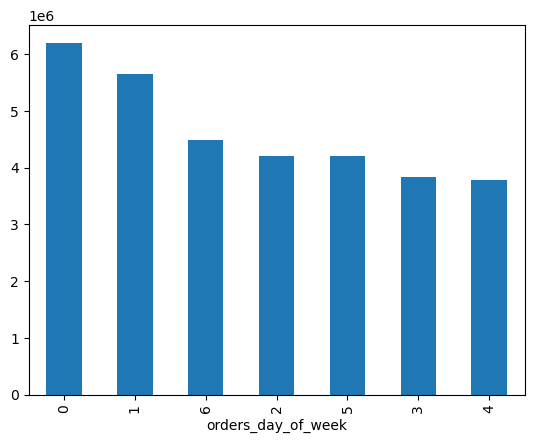

In [6]:
# Creating a bar chart by each value we got from .value_count() function
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

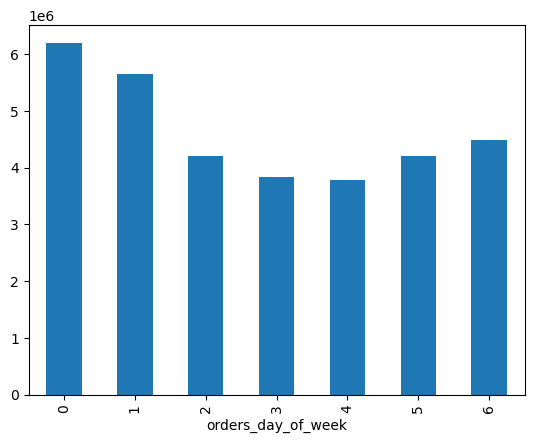

In [7]:
# The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [9]:
# Using sort_index() when printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

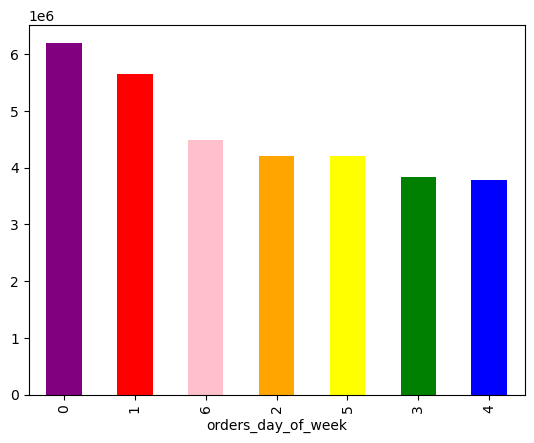

In [10]:
# Changing colors of the bar chart by attribute color
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

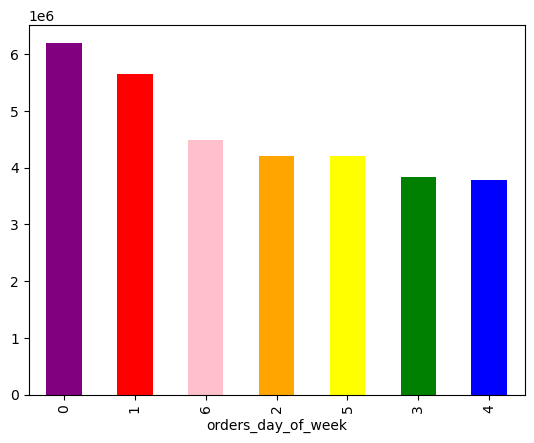

In [11]:
# Saving it into a 'bar' object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Exporting the bar chart

In [12]:
# Exporing it outside of Jupyter in the form of an image file by figure.savefig() function
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

2.2 Histrograms

<Axes: ylabel='Frequency'>

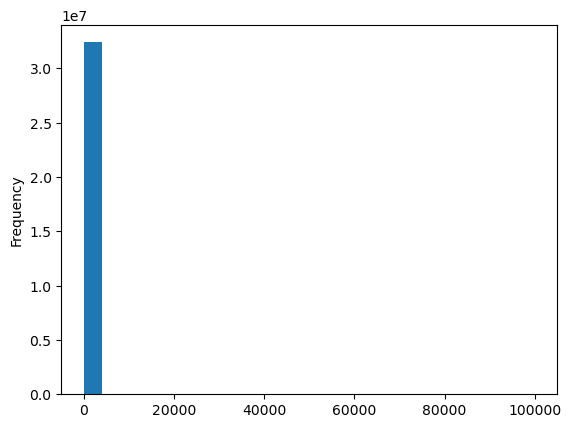

In [13]:
# Creating a histrogram chart of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# Something does not seem right. It shoud have 25 bins as we coded. I used .describe() to investigate it
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

We can see that most of the data are between 7 and 12, as the mean value is 12 and the median value is 7.4. However, the maximum value is 99,999, which causes our histogram to display an unusual shape.

2.3 Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

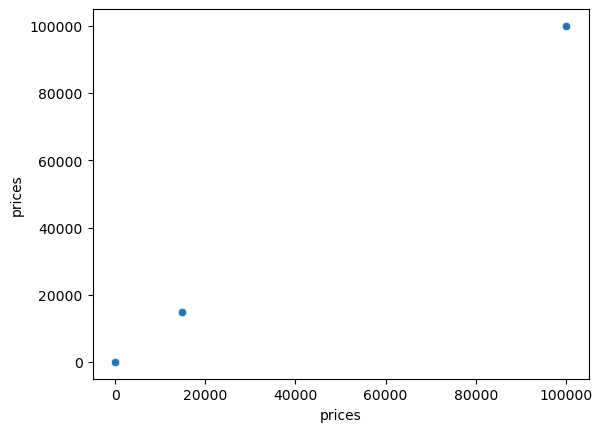

In [15]:
# To investigate the relationship between 2 variables, I am using scatterplot.
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In reality the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier.

In [16]:
# Writing a code to filter out items > $100 with loc() function
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Busiest days,loyalty_flag,spending_flag,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regular customer,High spender,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regular customer,High spender,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,New customer,High spender,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest days,New customer,High spender,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest days,Regular customer,High spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest days,Regular customer,High spender,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regular customer,High spender,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Slowest days,Regular customer,High spender,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,New customer,High spender,Frequent customer


Over 5,000 rows contain outlier price values.

In [17]:
# Using an if-statement with the loc() function to replace values where prices are greater than 100 with NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
# Running a test to check if a price has been replaced with a NaN value. Now, the price value in row 1576 has been replaced with NaN.
ords_prods_merge.loc[1576]['prices']

nan

In [19]:
# Using .max() function to check the max values after replacing the outliers with NaN
# Now our prices are in accepable range.
ords_prods_merge['prices'].max()

25.0

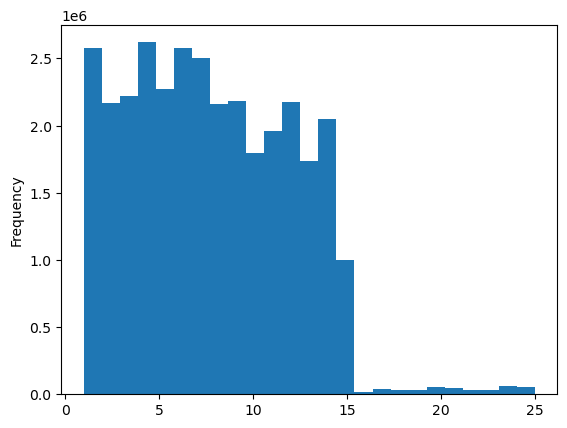

In [20]:
# re-run the histograms function
hist25 = ords_prods_merge['prices'].plot.hist(bins = 25)

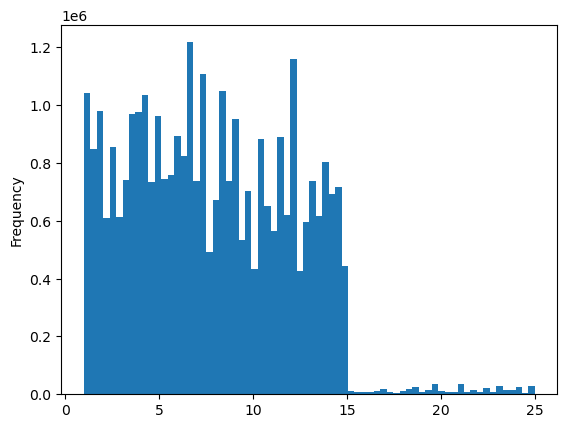

In [21]:
hist70 = ords_prods_merge['prices'].plot.hist(bins = 70)

Exporting the histogram

In [22]:
hist70.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

This subset wouldn’t be representative of the entire population, so we are using sampling data instead.

Sampling Data

In [23]:
# Using random() function from Numpy library to create number from 0-1 for 32,404,859 number 
# by using len() to find the size of ords_prods_merge dataframe
# filter only numbers less than or equal to 0.7 according to our sampling data plan
# Choosing the random pattern no.4 (seed 4) to get the same output everytime we run the code
np.random.seed(2)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
# The output of True or False for every value based on whether it’s less than or equal to 0.7
dev

array([ True,  True,  True, ..., False,  True,  True])

In [25]:
# Testing the 70% of the sample data
ords_prods_merge[dev].head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,total_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Busiest days,loyalty_flag,spending_flag,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Regularly busy,New customer,Low spender,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Regularly busy,New customer,Low spender,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,Regularly busy,New customer,Low spender,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Regularly busy,New customer,Low spender,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Regularly busy,New customer,Low spender,Non-frequent customer


In [26]:
# Checking how many counts for 70% of sample of the dataframe
# The whole dataframe = 32,404,859 so 70% of 32,404,859 approx. 22,680,000 data
len(ords_prods_merge[dev])

22680491

In [27]:
# Storing 70% of the sample in the dataframe 'big'
big = ords_prods_merge[dev]

In [28]:
# So 30% of the sample in the dataframe not'big'  which is [~dev] in code format
# Storing 30% of the sample in the dataframe 'small'
small = ords_prods_merge[~dev]

In [29]:
# 70% + 30% = the entire dataframe which is 32,404,859
len(big) + len(small)

32404859

In [30]:
# To speed up the processing time by including only necessary columns for the chart we are going to create.
df_2 = small[['orders_day_of_week','prices']]

2.4 Line chart

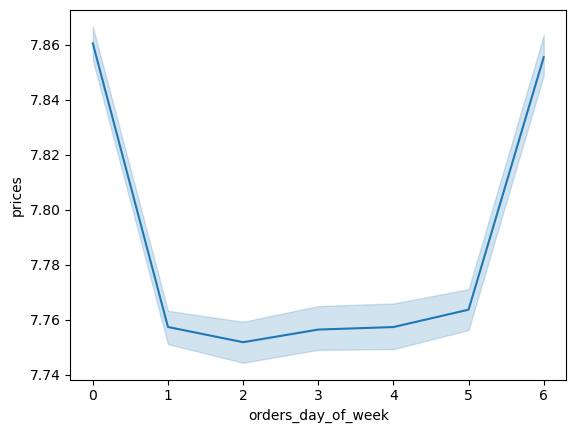

In [31]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [32]:
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64

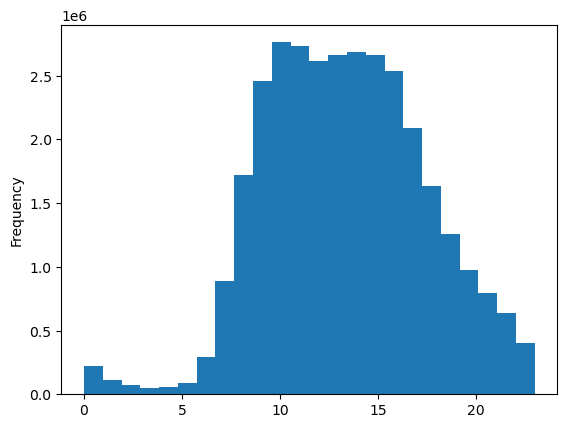

In [33]:
# Creating a histrogram chart of the 'prices' column.
hist = df['order_hour_of_day'].plot.hist(bins = 24)

The 'order_hour_of_day' column contains values ranging from 0 to 23, so when plotting histograms, I chose a bin size of 24. Each bin represents one hour. We can see that the hours from 9 to 18 have the highest frequencies, which makes sense because those hours approximately correspond to 9 a.m. to 6 p.m.

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

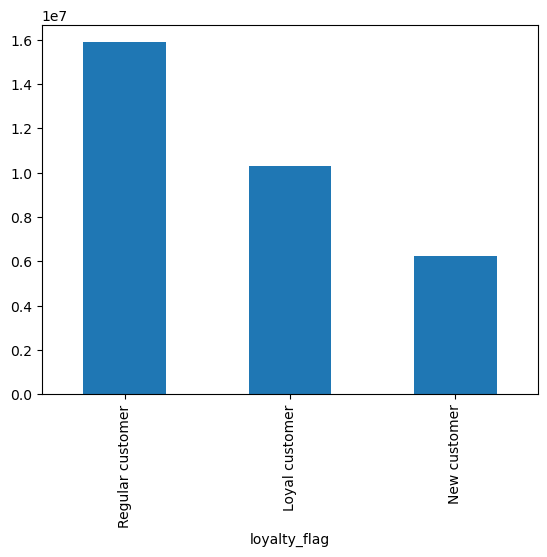

In [34]:
bar = df['loyalty_flag'].value_counts().plot.bar()

It is clear that the group of regular customers has a significantly higher frequency than the group of loyal customers in second place, followed by the group of new customers in third place.

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [35]:
# Check how many rows the df dataframe has by using len() function.
len(df)

32404859

In [36]:
# Create a pattern of the random sample
np.random.seed(2)

In [37]:
# Use the random() function to create 32,404,859 sample data points (equal to the size of the dataframe).
# Limit the amount of data to 70% of 32,404,859.
# Save the result in to dev variable.
dev = np.random.rand(len(df)) <= 0.7

In [38]:
# Map the dev variable with the entire dataframe and save it into a new dataframe.
big = df[dev]

In [39]:
# 'big' dataframe has data approx. 70% of the entire dataframe.
big.shape

(22680491, 27)

In [40]:
# 'small' dataframe has 100-70 - 30% of the entire dataframe. 
small = df[~dev]

In [41]:
small.shape

(9724368, 27)

In [42]:
# The total rows of the entire dataframe 
len(small) + len(big)

32404859

In [43]:
# We are interested in only 2 variables which are 'prices' and 'order_hour_of_day'
# We use 30% of the entire dataframe as sample data.
sample_price_hour = small[['prices', 'order_hour_of_day']]

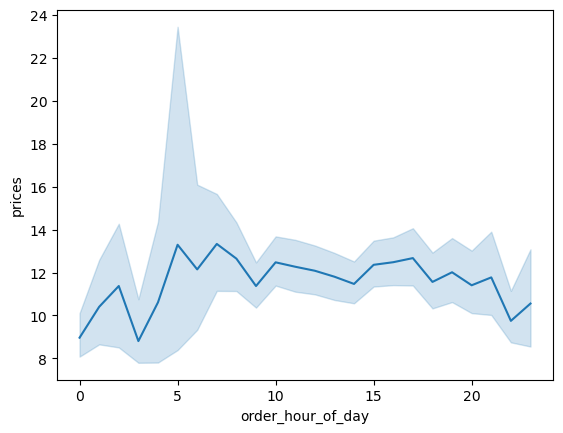

In [44]:
# Plot the line chart
line1 = sns.lineplot(data = sample_price_hour, x = 'order_hour_of_day', y = 'prices')

The chart shows that the hours from 5 to 8 have higher prices than the other hours. Additionally, if we consider the error bands in the graph, it is statistically more likely that the prices will fall within the higher range at hour 5 compared to the other hours.

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [45]:
# We are interested in only 2 variables which are 'Age' and 'Number of Dependents'
sample_age_dependent = small[['Age', 'Number of Dependents']]

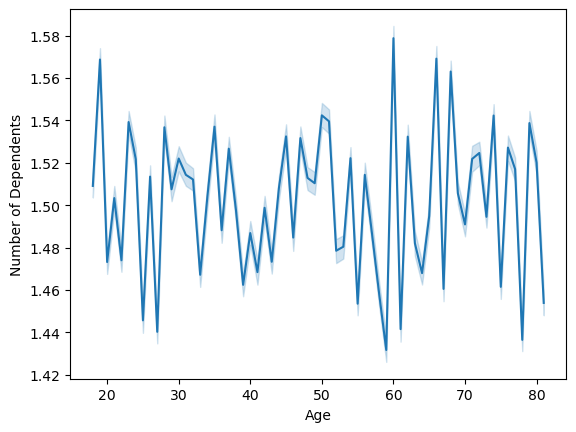

In [46]:
line2 = sns.lineplot(data = sample_age_dependent, x = 'Age', y = 'Number of Dependents')

The line chart shows the relationship between age and the number of dependents. I do not see any clear pattern between these two variables. However, I notice that at ages 20 and 60 to 70, there is a greater likelihood of having more dependents (based on this sample data) compared to other ages.

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

I decided to use the entire dataframe (df) to create the scatter plot and represent the real data instead of using sample data, as I did for the line chart above.

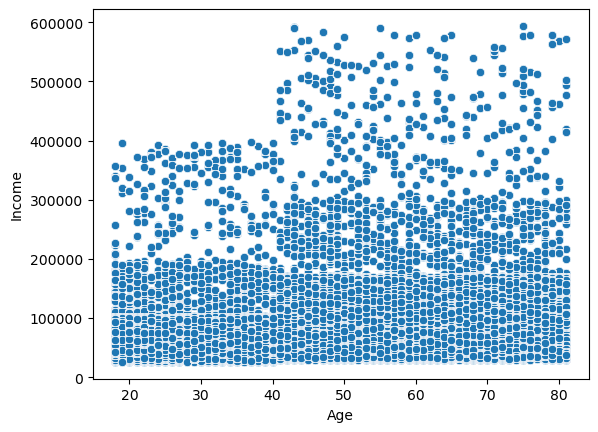

In [47]:
# To investigate the relationship between 2 variables, I am using scatterplot.
scatter = sns.scatterplot(x = 'Age', y = 'Income',data = df)

The results show that:
1. All ages have the same income base ranging from 0 to 20,000, with a similar density. 
2. Focusing on the income range of 20,000 to 30,000, all ages have data in this range, but ages 40 to 80 show a much higher density than ages 20 to 40.
3. There is a clear pattern that individuals aged 40 and over have a much greater chance of achieving higher incomes, particularly in the range of 40,000 to 60,000.

Using a scatter plot helps us see and understand the relationship between 2 variables.

#### 8. Export your visualizations as “.png” files in your relevant project folder.

In [48]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 histogram_order hour of day.png'))
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 bar_loyalty flag.png'))
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line1_order hour of day_prices.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line2_age_depentdents.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 scatter_age_income.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9 line_orders_day_of_week_vs_prices.png'))